In [1]:
import pandas as pd

# Ruta al CSV desde la carpeta notebooks/limpieza/phishing
file_path = "../../../data/raw/phishing/TweetFeed/year.csv"

# Cargar CSV original
df = pd.read_csv(file_path)

# Renombrar columnas
df = df.rename(columns={
    df.columns[0]: "fecha",
    df.columns[1]: "autor",
    df.columns[2]: "tipo",
    df.columns[3]: "valor",
    df.columns[4]: "tags",
    df.columns[5]: "tweet_origen"
})

# Filtrar solo URLs
df_urls = df[df["tipo"] == "url"].copy()

print("Total de URLs phishing detectadas:", len(df_urls))
df_urls.head(10)


Total de URLs phishing detectadas: 68920


,fecha,autor,tipo,valor,tags,tweet_origen
1,2024-12-21 10:36:42,drb_ra,url,http://18.207.155.112:443,#CobaltStrike,https://x.com/drb_ra/status/1870418107791020366
4,2024-12-21 12:19:14,masaomi346,url,https://juvenilityjuveni.tcphn.com,#phishing,https://x.com/masaomi346/status/18704439113046...
6,2024-12-21 12:19:14,masaomi346,url,https://liajuvenilesjuve.thflh.com,#phishing,https://x.com/masaomi346/status/18704439113046...
8,2024-12-21 12:19:14,masaomi346,url,https://nilediabeteslyteh.thjqd.com,#phishing,https://x.com/masaomi346/status/18704439113046...
10,2024-12-21 12:19:14,masaomi346,url,https://ozostomiaozonous.thljb.com,#phishing,https://x.com/masaomi346/status/18704439113046...
11,2024-12-21 13:01:41,SarlackLab,url,http://167.71.56.116:22342,#Njrat,https://x.com/SarlackLab/status/18704545954342...
13,2024-12-21 13:01:41,SarlackLab,url,http://eu-central-7075.packetriot.net,#Njrat,https://x.com/SarlackLab/status/18704545954342...
16,2024-12-21 13:24:58,Phish_Destroy,url,https://northstardist.icu,#malware #phishing,https://x.com/Phish_Destroy/status/18704604561...
18,2024-12-21 13:27:29,CarlyGriggs13,url,https://claim.chiiiguys.com,#phishing #malware,https://x.com/CarlyGriggs13/status/18704610881...
20,2024-12-21 13:34:28,CarlyGriggs13,url,https://2xelon.com,#malware #phishing,https://x.com/CarlyGriggs13/status/18704628461...


In [2]:
df_urls = df_urls.drop_duplicates(subset=["valor"])
print("Tras deduplicar:", len(df_urls)) 


Tras deduplicar: 65183


In [3]:
# Filtrar solo URLs con tag que incluya 'phishing'
df_urls_phish = df_urls[df_urls["tags"].str.contains("phishing", case=False, na=False)].copy()

print("Total URLs con tag phishing:", len(df_urls_phish))
df_urls_phish.head(10)


Total URLs con tag phishing: 39279


,fecha,autor,tipo,valor,tags,tweet_origen
4,2024-12-21 12:19:14,masaomi346,url,https://juvenilityjuveni.tcphn.com,#phishing,https://x.com/masaomi346/status/18704439113046...
6,2024-12-21 12:19:14,masaomi346,url,https://liajuvenilesjuve.thflh.com,#phishing,https://x.com/masaomi346/status/18704439113046...
8,2024-12-21 12:19:14,masaomi346,url,https://nilediabeteslyteh.thjqd.com,#phishing,https://x.com/masaomi346/status/18704439113046...
10,2024-12-21 12:19:14,masaomi346,url,https://ozostomiaozonous.thljb.com,#phishing,https://x.com/masaomi346/status/18704439113046...
16,2024-12-21 13:24:58,Phish_Destroy,url,https://northstardist.icu,#malware #phishing,https://x.com/Phish_Destroy/status/18704604561...
18,2024-12-21 13:27:29,CarlyGriggs13,url,https://claim.chiiiguys.com,#phishing #malware,https://x.com/CarlyGriggs13/status/18704610881...
20,2024-12-21 13:34:28,CarlyGriggs13,url,https://2xelon.com,#malware #phishing,https://x.com/CarlyGriggs13/status/18704628461...
22,2024-12-21 13:48:02,Phish_Destroy,url,https://teslafund.io,#phishing #malware,https://x.com/Phish_Destroy/status/18704662608...
24,2024-12-21 14:00:24,Phish_Destroy,url,https://basenetwork-tge.com,#phishing #malware,https://x.com/Phish_Destroy/status/18704693719...
26,2024-12-21 14:11:01,Phish_Destroy,url,https://a.godogs.cc,#malware #phishing,https://x.com/Phish_Destroy/status/18704720417...


In [4]:
from urllib.parse import urlparse

df_urls_phish["host"] = df_urls_phish["valor"].apply(lambda x: urlparse(str(x)).hostname)
print("Dominios únicos:", df_urls_phish["host"].nunique())
df_urls_phish["host"].value_counts().head(20)


Dominios únicos: 37595


host
96e11f39.cn         12
aijko.cn             9
grvkg.asia           8
aigprd.asia          8
xxrq.asia            8
ggzar.cn             8
pvidcm.asia          8
lfhal.asia           8
wnen.asia            8
drfse.asia           8
spmq.asia            8
sites.google.com     7
orvxy.cn             7
3d59d16e.cn          7
uvbow.cn             7
ciooe.net            6
lomvfedyc.cn         6
vgfaj.cn             6
hotvz.cn             6
ljryt.cn             6
Name: count, dtype: int64

In [5]:
import pandas as pd
import unicodedata
import re

# --- Función para parsear tabla Markdown ---
def parse_md_table_file(path):
    lines = [ln.rstrip("\n") for ln in open(path, "r", encoding="utf-8", errors="ignore").read().splitlines()]
    tables = []
    i = 0
    while i < len(lines):
        line = lines[i]
        if "|" in line and not line.strip().startswith("```"):
            if i + 1 < len(lines):
                sep = lines[i+1]
                if "|" in sep and re.fullmatch(r"\s*\|?[\s:\-|\+]+\|?\s*", sep):
                    header = [c.strip() for c in line.strip().strip("|").split("|")]
                    rows = []
                    j = i + 2
                    while j < len(lines):
                        row = lines[j]
                        if not row.strip() or ("|" not in row) or row.strip().startswith("```"):
                            break
                        if re.fullmatch(r"\s*\|?[\s:\-|\+]+\|?\s*", row):
                            j += 1; continue
                        cells = [c.strip() for c in row.strip().strip("|").split("|")]
                        if len(cells) < len(header): 
                            cells += [""]*(len(header)-len(cells))
                        elif len(cells) > len(header): 
                            cells = cells[:len(header)]
                        rows.append(cells)
                        j += 1
                    if rows:
                        tables.append(pd.DataFrame(rows, columns=header))
                        i = j; continue
        i += 1
    return tables[0] if tables else None

# --- Normalizar texto (minúsculas, sin tildes) ---
def normalize(s: str) -> str:
    s = s.lower().strip()
    s = unicodedata.normalize("NFKD", s)
    return "".join(ch for ch in s if not unicodedata.category(ch).startswith("M"))

# --- 1) Cargar tabla markdown ---
empresas_path = "../../../docs/tabla_empresas.md"  # ajusta si hace falta
empresas_df = parse_md_table_file(empresas_path)

# --- 2) Identificar columnas de empresa y sector ---
brand_col = next(c for c in empresas_df.columns if "empresa" in c.lower() or "plataforma" in c.lower() or "marca" in c.lower())
sector_col = next(c for c in empresas_df.columns if "sector" in c.lower())

# --- 3) Construir diccionario empresa->sector ---
diccionario_empresas = {
    normalize(row[brand_col]): str(row[sector_col]).strip()
    for _, row in empresas_df.iterrows()
    if isinstance(row[brand_col], str) and row[brand_col].strip()
}

print("Total empresas cargadas:", len(diccionario_empresas))
print("Ejemplos:")
list(diccionario_empresas.items())[:15]


Total empresas cargadas: 104
Ejemplos:


[('banco santander', 'Banca / FinTech'),
 ('caixabank', ''),
 ('sabadell', ''),
 ('ing espana', ''),
 ('openbank', ''),
 ('bankinter', ''),
 ('kutxabank', ''),
 ('evo banco', ''),
 ('unicaja banco', ''),
 ('banco de espana', ''),
 ('cajamar', ''),
 ('abanca', ''),
 ('santander consumer finance', ''),
 ('banca march', ''),
 ('ibercaja', '')]

In [6]:
import tldextract
from urllib.parse import urlparse

In [7]:

# Función para normalizar texto: convierte a minúsculas y elimina acentos
def normalize(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = s.lower().strip()
    s = unicodedata.normalize("NFKD", s)
    return "".join(ch for ch in s if not unicodedata.category(ch).startswith("M"))

# Función para extraer host, dominio base y path de una URL
def split_url(u: str):
    try:
        p = urlparse(u)
        host = p.netloc.lower()
        path = p.path or "/"
        # Extrae el dominio registrable (por ejemplo: 'bbva.es')
        ext = tldextract.extract(host)
        registrable = f"{ext.domain}.{ext.suffix}" if ext.suffix else ext.domain
        return host, registrable, path
    except Exception:
        return "", "", ""


In [8]:
# === CELDA 4 ===
# Aplicamos split_url a cada URL para obtener columnas clave

# Usamos la columna 'valor' que contiene la URL original
df_urls_phish[["host", "registrable", "path"]] = df_urls_phish["valor"].apply(
    lambda u: pd.Series(split_url(u))
)

# Mostramos algunos resultados para comprobar
df_urls_phish[["valor", "host", "registrable", "path"]].head(10)


,valor,host,registrable,path
4,https://juvenilityjuveni.tcphn.com,juvenilityjuveni.tcphn.com,tcphn.com,/
6,https://liajuvenilesjuve.thflh.com,liajuvenilesjuve.thflh.com,thflh.com,/
8,https://nilediabeteslyteh.thjqd.com,nilediabeteslyteh.thjqd.com,thjqd.com,/
10,https://ozostomiaozonous.thljb.com,ozostomiaozonous.thljb.com,thljb.com,/
16,https://northstardist.icu,northstardist.icu,northstardist.icu,/
18,https://claim.chiiiguys.com,claim.chiiiguys.com,chiiiguys.com,/
20,https://2xelon.com,2xelon.com,2xelon.com,/
22,https://teslafund.io,teslafund.io,teslafund.io,/
24,https://basenetwork-tge.com,basenetwork-tge.com,basenetwork-tge.com,/
26,https://a.godogs.cc,a.godogs.cc,godogs.cc,/


In [9]:
# === CELDA 5 ===
# Creamos un diccionario normalizado: marca → sector
brand_to_sector = {normalize(k): v for k, v in diccionario_empresas.items()}

# Creamos un diccionario de variantes de marca (sin espacios, guiones...)
def mk_variants(name: str):
    base = normalize(name)
    compact = re.sub(r'[\s\.-_]+', '', base)
    return {base, compact}

# Diccionario marca → set de variantes
brand_lexicon = {b: mk_variants(b) for b in brand_to_sector.keys()}

# Función para detectar si una URL contiene alguna marca conocida
def brand_match(host: str, path: str) -> tuple[str, str]:
    host_norm = normalize(host)
    path_norm = normalize(path)
    for brand, variants in brand_lexicon.items():
        for v in variants:
            if v and (v in host_norm or v in path_norm):
                return brand, brand_to_sector.get(brand, "")
    return "", ""

# Aplicamos a cada fila para detectar marca y sector
df_urls_phish[["brand", "sector"]] = df_urls_phish.apply(
    lambda r: pd.Series(brand_match(r["host"], r["path"])), axis=1
)

# Revisión rápida
df_urls_phish[["valor", "brand", "sector"]].query("brand != ''").head(10)


,valor,brand,sector
92,https://allocations-wisemonky.pages.dev,wise,
161,https://steamcommunity-ua.com,steam,
177,https://pop.spotifycloning1.freewebhostmost.com,spotify,
264,https://digitalweb.live,digi,
268,https://digitalmintx.com,digi,
425,https://luandigital.site,digi,
581,https://app1.kraken688.xyz,kraken,
665,https://seo.wagaia.fr/DHL-EU/tracking-express....,dhl,
667,https://392029-coinbase.com,coinbase,
727,http://mytscubic-asaster.eglsl.cn,gls,


In [10]:
# === CELDA 6 ===
# Función que evalúa 4 indicadores para determinar si la URL apunta a usuarios españoles

def score_es_final(url: str, host: str, path: str) -> tuple[int, dict]:
    score = 0
    flags = {
        "f_es_tld": False,       # dominio .es
        "f_locale_es": False,    # ruta contiene /es o /es-ES
        "f_euro": False,         # símbolo €
        "f_plus34": False        # código internacional +34
    }

    if ".es" in host or host.endswith(".es"):
        score += 2
        flags["f_es_tld"] = True

    if re.search(r"/es([-_/]|$)", path, re.I):
        score += 1
        flags["f_locale_es"] = True

    if "€" in url or "%E2%82%AC" in url.upper():
        score += 1
        flags["f_euro"] = True

    if "+34" in url or "%2B34" in url:
        score += 1
        flags["f_plus34"] = True

    return score, flags


In [11]:
# === CELDA 6 bis ===
# Aplicamos la función y separamos las señales en columnas

df_urls_phish[["s_es_score", "es_flags"]] = df_urls_phish.apply(
    lambda r: pd.Series(score_es_final(r["valor"], r["host"], r["path"])), axis=1
)

# Expandimos el diccionario de flags a columnas booleanas
es_flags_df = df_urls_phish["es_flags"].apply(pd.Series)
df_urls_phish = pd.concat([df_urls_phish, es_flags_df], axis=1)

# Visualización rápida
df_urls_phish[["valor", "s_es_score", "f_es_tld", "f_locale_es", "f_euro", "f_plus34"]].head(10)


,valor,s_es_score,f_es_tld,f_locale_es,f_euro,f_plus34
4,https://juvenilityjuveni.tcphn.com,0,False,False,False,False
6,https://liajuvenilesjuve.thflh.com,0,False,False,False,False
8,https://nilediabeteslyteh.thjqd.com,0,False,False,False,False
10,https://ozostomiaozonous.thljb.com,0,False,False,False,False
16,https://northstardist.icu,0,False,False,False,False
18,https://claim.chiiiguys.com,0,False,False,False,False
20,https://2xelon.com,0,False,False,False,False
22,https://teslafund.io,0,False,False,False,False
24,https://basenetwork-tge.com,0,False,False,False,False
26,https://a.godogs.cc,0,False,False,False,False


In [12]:
# === CELDA 7 ===
# Lista de palabras clave que suelen aparecer en campañas de phishing en español
KW_ES_RE = re.compile(
    r"(factura|multa|notificaci[oó]n|aviso|env[ií]o|paquete|entrega|declaraci[oó]n|"
    r"impuestos?|pago|recibo|clientes?|acceso|cuenta|seguridad|verificar|iniciar[-_]?sesi[oó]n)",
    re.I
)

# Función para puntuar y marcar si hay alguna palabra clave española en el path
def score_kw_es(path: str) -> tuple[int, bool]:
    has_kw = bool(KW_ES_RE.search(path))
    return (1, True) if has_kw else (0, False)


In [13]:
# === CELDA 7 bis ===
# Aplicamos la función sobre la columna 'path'

df_urls_phish[["s_kw_es", "f_kw_es"]] = df_urls_phish["path"].apply(
    lambda p: pd.Series(score_kw_es(p))
)

# Revisión rápida
df_urls_phish[["valor", "path", "s_kw_es", "f_kw_es"]].query("f_kw_es == True").head(10)


,valor,path,s_kw_es,f_kw_es
1063,https://bafybeihqheyiu6zhkpdx2qzcvhni7wfi5jfti...,/clientemailsetup.html,1,True
68478,https://sicredxresgate.com/entrada/assets/veri...,/entrada/assets/verificar.php,1,True
93563,https://boxperience.es/cuenta/es-ing/ing,/cuenta/es-ing/ing,1,True
124380,https://pago-master.digital/Confirmacio%CC%81n...,/Confirmacio%CC%81n%20de%20Pago.html,1,True


In [14]:
# Expresión regular para detectar términos urgentes o amenazas típicas
URGENT_KW_RE = re.compile(
    r"(verificar|cuenta|bloqueo|urgente|seguridad|suspendid[ao]|restringid[ao])",
    re.I
)

# La función ahora recibe también la marca detectada como argumento explícito
def score_urgente(host: str, path: str, brand: str) -> tuple[int, bool]:
    tiene_marca = bool(brand)
    tiene_kw = bool(URGENT_KW_RE.search(f"{host}{path}"))
    if tiene_marca and tiene_kw:
        return 3, True
    return 0, False

In [15]:
# === CELDA 8 bis ===
# Pasamos también la columna 'brand' como argumento
df_urls_phish[["s_urgente", "f_urgente"]] = df_urls_phish.apply(
    lambda r: pd.Series(score_urgente(r["host"], r["path"], r["brand"])), axis=1
)

# Revisión rápida de positivos
df_urls_phish[["valor", "brand", "path", "s_urgente", "f_urgente"]].query("f_urgente == True").head(10)


,valor,brand,path,s_urgente,f_urgente
60300,https://webmail.verificarecapiti-coinbase.com,coinbase,/,3,True
83462,https://dev.verificarecapiti-coinbase.com,coinbase,/,3,True
111920,https://intranet.verificarecapiti-coinbase.com,coinbase,/,3,True


In [16]:
# === CELDA 9 ===
# Regex que busca señales de idiomas no españoles (japonés, ruso, chino, tailandés, etc.)
INTL_HINT_RE = re.compile(
    r"(lang=ja|tl=ja|/jp/|/ru/|/kr/|/cn/|/zh/|/th/|/vn/|/ph/|/id/|\.jp|\.ru|\.cn|\.kr|\.th|\.vn|\.id)",
    re.I
)

# Si detecta alguna, restamos 2 puntos y marcamos f_idioma_extranjero
def score_idioma_extranjero(url: str) -> tuple[int, bool]:
    has_foreign = bool(INTL_HINT_RE.search(url))
    return (-2, True) if has_foreign else (0, False)


In [17]:
# === CELDA 9 bis ===
# Aplicamos sobre la columna 'valor' que contiene la URL completa

df_urls_phish[["s_idioma_extranjero", "f_idioma_extranjero"]] = df_urls_phish["valor"].apply(
    lambda u: pd.Series(score_idioma_extranjero(u))
)

# Revisión de ejemplos que fueron penalizados
df_urls_phish[["valor", "s_idioma_extranjero", "f_idioma_extranjero"]].query("f_idioma_extranjero == True").head(10)


,valor,s_idioma_extranjero,f_idioma_extranjero
6,https://liajuvenilesjuve.thflh.com,-2,True
8,https://nilediabeteslyteh.thjqd.com,-2,True
10,https://ozostomiaozonous.thljb.com,-2,True
402,https://chebupeli.ru,-2,True
529,https://claimuninow.run,-2,True
581,https://app1.kraken688.xyz,-2,True
668,http://rfcfvz.cn/raZkuEtUen,-2,True
673,http://sfzef.cn,-2,True
674,http://mvljkr.cn,-2,True
675,http://rgvoab.cn,-2,True


In [18]:
# === CELDA 10 ===
# Diccionario manual: marca correcta → variantes mal escritas
errores_marca_raw = {
    "bbva": ["bva", "bvva", "bbba", "beuvea", "bebea"],
    "santander": ["santader", "santaner", "satander", "santande", "santader-particulares"],
    "caixabank": ["caixabanc", "caixabanknow", "caixaban", "lacaxia", "caisa", "kaxabank"],
    "sabadell": ["sabadel", "basadell", "sabadell-atlantico", "sabadellonline"],
    "bankinter": ["bankiter", "banquinter", "bankinter-empresas", "bainter"],
    "ing": ["ing-direct", "ing-es", "ign", "ing-web"],
    "unicaja": ["unicaga", "unciaja", "unicja", "unicaja-banco"],
    "abanca": ["abanka", "abamca", "abanca-es"],
    "kutxabank": ["kutxabanc", "kuxabank", "kutxa"],
    "bizum": ["bizun", "bizuum", "bizum-es", "bizum-pago"],
    "iberdrola": ["iberola", "iberdorla", "iberdrolaclientes"],
    "endesa": ["enedsa", "endesaclientes", "endesa-online"],
    "naturgy": ["naturgi", "naturalgy", "naturyi"],
    "repsol": ["resol", "repson", "repsol-es"],
    "movistar": ["movista", "movistar-plus", "movitar", "moviestar", "mobistar"],
    "orange": ["oranje", "orage", "orange-es"],
    "vodafone": ["vodafon", "vodafnoe", "vodafone-es"],
    "masmovil": ["masmovil", "masmovi"],
    "telefonica": ["telefnica", "telefonico"]
}

# Aplanamos el diccionario: variante → marca real
dicc_errores = {}
for marca_real, variantes in errores_marca_raw.items():
    for v in variantes:
        dicc_errores[normalize(v)] = normalize(marca_real)

# Función para detectar errores tipográficos
def detectar_marca_con_error(host: str, path: str) -> tuple[int, str, bool]:
    texto = normalize(host + path)
    for variante, marca_real in dicc_errores.items():
        if variante in texto:
            return 2, marca_real, True  # suma 2 puntos si se encuentra
    return 0, "", False


In [19]:
# === CELDA 10 bis ===
# Aplicamos a cada fila del DataFrame

df_urls_phish[["s_marca_mal", "marca_detectada_mal", "f_marca_mal"]] = df_urls_phish.apply(
    lambda r: pd.Series(detectar_marca_con_error(r["host"], r["path"])), axis=1
)

# Revisión de URLs con errores de marca detectados
df_urls_phish[df_urls_phish["f_marca_mal"] == True][
    ["valor", "host", "path", "marca_detectada_mal", "s_marca_mal"]
].head(10)


,valor,host,path,marca_detectada_mal,s_marca_mal
60,https://www.blockchainsigns.io.defiswaps.io,www.blockchainsigns.io.defiswaps.io,/,ing,2
86,https://signup-fluence.com,signup-fluence.com,/,ing,2
332,https://dhnxignm.com,dhnxignm.com,/,ing,2
431,https://amendespaiementsenligne.ath.cx/12/3dse...,amendespaiementsenligne.ath.cx,/12/3dsec.php,ing,2
1399,https://signup-beckercoin.xyz,signup-beckercoin.xyz,/,ing,2
1556,https://signup-pufferunifi.com,signup-pufferunifi.com,/,ing,2
1642,https://metamask.io.one-sign.in,metamask.io.one-sign.in,/,ing,2
1783,https://seversid-ameazon-prim.hgjtgk.cn/apsign...,seversid-ameazon-prim.hgjtgk.cn,/apsigninopenid,ing,2
1992,https://web3resolver-syncapp.pages.dev,web3resolver-syncapp.pages.dev,/,repsol,2
2222,http://qfast.duckdns.org/bbva5/,qfast.duckdns.org,/bbva5/,bbva,2


In [20]:
# Mostrar solo las filas con marcas mal escritas detectadas
df_urls_phish[df_urls_phish["f_marca_mal"] == True][
    ["valor", "host", "path", "marca_detectada_mal", "s_marca_mal"]
].head(10)



,valor,host,path,marca_detectada_mal,s_marca_mal
60,https://www.blockchainsigns.io.defiswaps.io,www.blockchainsigns.io.defiswaps.io,/,ing,2
86,https://signup-fluence.com,signup-fluence.com,/,ing,2
332,https://dhnxignm.com,dhnxignm.com,/,ing,2
431,https://amendespaiementsenligne.ath.cx/12/3dse...,amendespaiementsenligne.ath.cx,/12/3dsec.php,ing,2
1399,https://signup-beckercoin.xyz,signup-beckercoin.xyz,/,ing,2
1556,https://signup-pufferunifi.com,signup-pufferunifi.com,/,ing,2
1642,https://metamask.io.one-sign.in,metamask.io.one-sign.in,/,ing,2
1783,https://seversid-ameazon-prim.hgjtgk.cn/apsign...,seversid-ameazon-prim.hgjtgk.cn,/apsigninopenid,ing,2
1992,https://web3resolver-syncapp.pages.dev,web3resolver-syncapp.pages.dev,/,repsol,2
2222,http://qfast.duckdns.org/bbva5/,qfast.duckdns.org,/bbva5/,bbva,2


In [21]:
# === CELDA 11 ===
# Función que suma todos los criterios de puntuación definidos anteriormente

def compute_score_total(row) -> int:
    score = 0

    # 1. Señales de orientación a España (.es, €, /es/, +34)
    score += row.get("s_es_score", 0)

    # 2. Palabras clave en español típicas de phishing (factura, seguridad, etc.)
    score += row.get("s_kw_es", 0)

    # 3. Combinación potente: marca conocida + palabra urgente (bloqueo, cuenta, etc.)
    score += row.get("s_urgente", 0)

    # 4. Marca legítima detectada (exacta, desde diccionario de empresas)
    if row.get("brand"):
        score += 2

    # 5. Marca mal escrita detectada
    score += row.get("s_marca_mal", 0)

    # 6. Penalización por señales de idioma extranjero (lang=ja, /jp/, etc.)
    score += row.get("s_idioma_extranjero", 0)

    return score


In [22]:
# === CELDA 11 bis ===
# Creamos una nueva columna con el score total para cada URL

df_urls_phish["score_total"] = df_urls_phish.apply(compute_score_total, axis=1)

# Visualizamos algunas URLs ordenadas por score descendente
df_urls_phish[["valor", "score_total"]].sort_values(by="score_total", ascending=False).head(10)


,valor,score_total
60300,https://webmail.verificarecapiti-coinbase.com,5
83462,https://dev.verificarecapiti-coinbase.com,5
111920,https://intranet.verificarecapiti-coinbase.com,5
92498,https://www.goudis.sbs/amazon=ap*signin000000,4
29483,http://coinbasewalletus.wixsite.com/coiinbasew...,4
66077,https://coinbase-signin-page.paypalt.com,4
134733,http://sites.google.com/view/docusign-uae,4
15450,http://vodafone.accept-term.com,4
38140,https://coinbase-signinreview.com,4
27381,https://coinbase-pro-sign-in.company.site,4


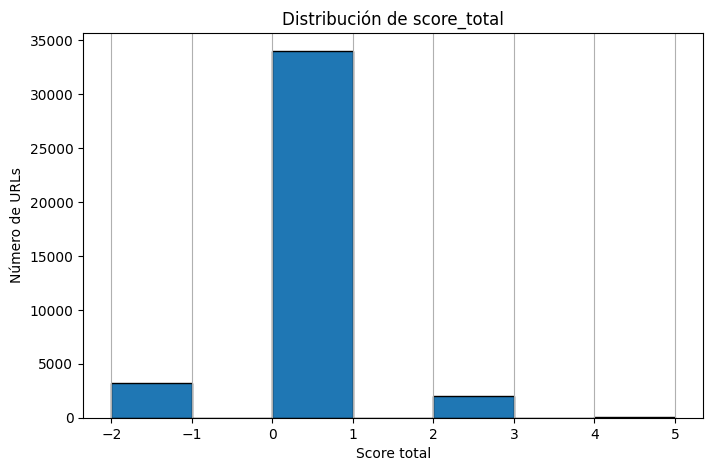

count    39279.000000
mean        -0.054431
std          0.738674
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: score_total, dtype: float64

In [23]:
# === CELDA 12 ===
import matplotlib.pyplot as plt

# Histograma de distribución de score_total
plt.figure(figsize=(8, 5))
df_urls_phish["score_total"].hist(bins=range(df_urls_phish["score_total"].min(), df_urls_phish["score_total"].max() + 1), edgecolor="black")
plt.title("Distribución de score_total")
plt.xlabel("Score total")
plt.ylabel("Número de URLs")
plt.grid(axis='y')
plt.show()

# Estadísticas generales del score
df_urls_phish["score_total"].describe()


In [24]:
# === CELDA 13 ===
# Filtramos solo las URLs que tienen señales fuertes (score_total >= 2)
df_filtradas = df_urls_phish[df_urls_phish["score_total"] >= 2].copy()

print("URLs filtradas con score >= 2:", len(df_filtradas))

# Guardamos el resultado como archivo CSV
output_path = "../../../data/processed/phishing/tweetfeed_filtradas.csv"
df_filtradas.to_csv(output_path, index=False)

print("Archivo guardado en:", output_path)


URLs filtradas con score >= 2: 2080


NameError: name 'output_path' is not defined

In [25]:
# === CELDA 14 ===
# Conteo de marcas detectadas
print("Top 15 marcas detectadas:")
print(df_filtradas["brand"].value_counts().head(15))

# Conteo de sectores detectados
print("\nTop 10 sectores detectados:")
print(df_filtradas["sector"].value_counts().head(10))


Top 15 marcas detectadas:
brand
coinbase      644
              351
digi          201
amazon        156
kraken        110
hbo            97
steam          60
binance        55
netflix        44
instagram      43
visa           39
facebook       37
ups            31
mastercard     26
spotify        18
Name: count, dtype: int64

Top 10 sectores detectados:
sector
                               1764
E-commerce / Retail             156
Criptomonedas / Inversión        55
Streaming / Entretenimiento      44
Redes Sociales                   37
Pago Online                      14
Telecomunicaciones                6
Viajes / Turismo                  2
Logística / Paquetería            2
Name: count, dtype: int64


# === CELDA 15 ===
doc_md = """
# Limpieza de Tweetfeed – URLs de Phishing en Español

Este documento describe el proceso seguido para filtrar URLs de Tweetfeed y seleccionar aquellas con alta probabilidad de representar intentos de phishing dirigidos a usuarios españoles.

---

## 🔍 Dataset original

- Total inicial: **39.279** URLs (tipo `url` con tag `phishing`)
- Fuente: CSV exportado desde Tweetfeed

---

## 🎯 Objetivo

Identificar URLs potencialmente dirigidas a usuarios españoles, usando señales como:

- Indicadores de idioma local (".es", "€", "+34", "/es/")
- Presencia de marcas españolas legítimas (exactas o con errores)
- Palabras clave frecuentes en phishing en español
- Términos urgentes o de seguridad
- Penalización por idioma extranjero

---

## 🧮 Sistema de puntuación (`score_total`)

| Criterio                                          | Score |
|--------------------------------------------------|--------|
| `.es` en dominio                                 | +2     |
| `/es/`, `/es-ES/` en ruta                        | +1     |
| Símbolo euro (`€`) o codificado (`%E2%82%AC`)    | +1     |
| Prefijo telefónico `+34` o `%2B34`               | +1     |
| Palabras clave phishing en español (ej: "cuenta")| +1     |
| Marca legítima detectada                         | +2     |
| Marca mal escrita detectada                      | +2     |
| Combinación marca + urgencia (ej: bloqueo)       | +3     |
| Indicador de idioma extranjero (`/jp/`, `lang=ja`) | –2     |

---

## 🧹 Resultado final

- Umbral aplicado: **score_total >= 2**
- URLs filtradas: **2080**
- CSV generado: `data/processed/phishing/tweetfeed_filtradas.csv`

---

## 📊 Análisis

- Se priorizaron URLs con múltiples señales cruzadas.
- Se excluyeron URLs en otros idiomas o sin relación con España.
- Se marcó cada URL con flags booleanos (`f_es_tld`, `f_kw_es`, etc.) para trazabilidad.

---

## ⏭️ Próximos pasos

- Análisis manual de campañas y agrupamiento por marca.
- Crawling sobre algunas URLs para extraer contenido adicional.
- Entrenamiento de modelos con este subconjunto como dataset base.

"""

# Guardamos el README en la carpeta de documentación
with open("../../../docs/limpieza_tweetfeed.md", "w", encoding="utf-8") as f:
    f.write(doc_md)

print("README de limpieza generado en: docs/limpieza_tweetfeed.md")


## === TRAMO 2: Filtrado del resto de TweetFeed (URLs no tratadas en Lote 1) ===

Este tramo trabaja exclusivamente con las 37.199 URLs que quedaron fuera del primer filtrado (lote 1 de 2080 URLs con `score_total >= 2` ya revisadas manualmente en `limpieza_tweetfeed.ipynb`).

Pasos en este tramo:
- Eliminar del dataset superior (`df_urls_phish`) todas las URLs ya tratadas (`df_filtradas`)
- Explorar los `score_total` más bajos (0 o 1) en busca de posibles falsos negativos
- Aplicar nuevos filtros o heurísticas que puedan revelar campañas relevantes
- Exportar solo si se encuentran subconjuntos que merecen limpieza manual

No se exportará ningún CSV hasta haber detectado URLs de valor.


In [27]:
# Restamos las URLs ya tratadas (las 2080) del dataset superior
urls_ya_tratadas = set(df_filtradas["valor"].astype(str).str.strip())

# El dataset original donde aplicar la resta es df_urls_phish
df_restante = df_urls_phish[~df_urls_phish["valor"].astype(str).isin(urls_ya_tratadas)].copy()

print("Total original:", len(df_urls_phish))
print("Ya tratadas:", len(df_filtradas))
print("Quedan por procesar:", len(df_restante))


Total original: 39279
Ya tratadas: 2080
Quedan por procesar: 37199


In [28]:
# === Análisis del score_total en URLs no tratadas (df_restante) ===
score_counts = df_restante["score_total"].value_counts().sort_index()
print("Distribución del score_total en el resto del dataset:")
display(score_counts)


Distribución del score_total en el resto del dataset:


score_total
-2     3189
 0    34007
 1        3
Name: count, dtype: int64

In [29]:
df_restante.sample(100)

,fecha,autor,tipo,valor,tags,tweet_origen,host,registrable,path,brand,...,s_kw_es,f_kw_es,s_urgente,f_urgente,s_idioma_extranjero,f_idioma_extranjero,s_marca_mal,marca_detectada_mal,f_marca_mal,score_total
123080,2025-06-24 13:03:13,CarlyGriggs13,url,https://is.itk.ac.id/NAGA99-WAP,#phishing,https://x.com/CarlyGriggs13/status/19374967378...,is.itk.ac.id,itk.ac.id,/NAGA99-WAP,,...,0,False,0,False,-2,True,0,,False,-2
118139,2025-06-16 00:01:53,catnap707,url,http://www-daiwa.sancaiyun.com,#phishing,https://x.com/catnap707/status/193440100341747...,www-daiwa.sancaiyun.com,sancaiyun.com,/,,...,0,False,0,False,0,False,0,,False,0
123626,2025-06-25 14:17:10,CarlyGriggs13,url,https://faceit.finistseasonmatch.pro,#phishing,https://x.com/CarlyGriggs13/status/19378777337...,faceit.finistseasonmatch.pro,finistseasonmatch.pro,/,,...,0,False,0,False,0,False,0,,False,0
112062,2025-06-07 01:28:01,CarlyGriggs13,url,https://gortheth.lol,#phishing #malware,https://x.com/CarlyGriggs13/status/19311611903...,gortheth.lol,gortheth.lol,/,,...,0,False,0,False,0,False,0,,False,0
130059,2025-07-07 15:00:24,harugasumi,url,https://nhbq6w.top/0zADfe,#phishing,https://x.com/harugasumi/status/19422372675544...,nhbq6w.top,nhbq6w.top,/0zADfe,,...,0,False,0,False,0,False,0,,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,2025-01-12 19:03:37,CarlyGriggs13,url,https://taylorcointl.com,#phishing #malware,https://x.com/CarlyGriggs13/status/18785182095...,taylorcointl.com,taylorcointl.com,/,,...,0,False,0,False,0,False,0,,False,0
67355,2025-03-20 11:53:33,CarlyGriggs13,url,https://c7wif.ycra.net,#phishing,https://x.com/CarlyGriggs13/status/19026899687...,c7wif.ycra.net,ycra.net,/,,...,0,False,0,False,0,False,0,,False,0
3660,2024-12-28 07:00:09,urldna_bot,url,https://usps.com-tracking-helpyh.cc/info,#scam #phishing,https://x.com/urldna_bot/status/18729003258723...,usps.com-tracking-helpyh.cc,com-tracking-helpyh.cc,/info,,...,0,False,0,False,0,False,0,,False,0
12132,2025-01-11 03:52:22,CarlyGriggs13,url,https://mmittamaklogimn.godaddysites.com,#phishing,https://x.com/CarlyGriggs13/status/18779264984...,mmittamaklogimn.godaddysites.com,godaddysites.com,/,,...,0,False,0,False,0,False,0,,False,0


In [31]:
# === CELDA: Actualizar SOLO el criterio de palabras clave ES y ajustar score_total en consecuencia ===
import re
import pandas as pd

assert 'df_restante' in globals(), "Asegúrate de tener df_restante (las 37.199 restantes)."

# 1) Backup para trazabilidad
if "s_kw_es" not in df_restante.columns:
    df_restante["s_kw_es"] = 0
if "f_kw_es" not in df_restante.columns:
    df_restante["f_kw_es"] = False
if "score_total" not in df_restante.columns:
    df_restante["score_total"] = 0

df_restante["s_kw_es_prev"]    = df_restante["s_kw_es"].fillna(0).astype(int)
df_restante["score_total_prev"] = df_restante["score_total"].fillna(0).astype(int)

# 2) Diccionario NUEVO de palabras clave en contexto español (ampliado)
KW_ES_RE_NEW = re.compile(
    r"(factura|multa|notificaci[oó]n|aviso|env[ií]o|paquete|entrega|"
    r"declaraci[oó]n|impuestos?|pago|recibo|clientes?|acceso|cuenta|"
    r"seguridad|verificar|iniciar[-_]?sesi[oó]n|bloqueo|restringido|"
    r"confirmaci[oó]n|urgente|intento|actividad|clave|contrase[nñ]a|"
    r"reembolso|suspendid[ao]|mensaje|sms|movimientos?|transacci[oó]n|"
    r"saldo|banca|login|appmovil|descarga|pin|token|actualizaci[oó]n|"
    r"confirmar|reanudar|soporte|servicio|bloquead[ao]|restricci[oó]n)",
    re.I
)

def _score_kw_es_new(path: str):
    has_kw = bool(KW_ES_RE_NEW.search(path or ""))
    return (1 if has_kw else 0, has_kw)

# 3) Recalcular SOLO el criterio de keywords
df_restante[["s_kw_es", "f_kw_es"]] = (
    df_restante["path"].fillna("").apply(_score_kw_es_new).apply(pd.Series)
)

# 4) Actualizar score_total manteniendo pesos (sumamos lo nuevo y restamos lo viejo de este criterio)
df_restante["score_total"] = (
    df_restante["score_total_prev"]
    - df_restante["s_kw_es_prev"]
    + df_restante["s_kw_es"]
).astype(int)

# 5) Métricas de impacto
cambios_kw   = int((df_restante["s_kw_es"] != df_restante["s_kw_es_prev"]).sum())
prev_pass    = df_restante["score_total_prev"] >= 2
new_pass     = df_restante["score_total"] >= 2
nuevos_gain  = int((new_pass & ~prev_pass).sum())

print(f"Criterio KW ES actualizado. Filas con cambio en s_kw_es: {cambios_kw}")
print(f"Nuevas URLs que ahora superan el umbral (>=2): {nuevos_gain}")

# 6) Vista rápida de las que GANARON el umbral
df_ganadoras = df_restante[new_pass & ~prev_pass][["valor","host","path","score_total"]].head(20)
display(df_ganadoras)


Criterio KW ES actualizado. Filas con cambio en s_kw_es: 748
Nuevas URLs que ahora superan el umbral (>=2): 0


,valor,host,path,score_total


In [32]:
# === CELDA: Evaluar si vale la pena mantener .es como criterio ===

# Aseguramos que la columna 'registrable' esté en formato string y en minúsculas
df_restante["registrable"] = df_restante["registrable"].astype(str).str.lower()

# Creamos la flag si termina en .es
df_restante["f_es_tld"] = df_restante["registrable"].str.endswith(".es")

# Contamos cuántas URLs tienen dominio .es
total_es = df_restante["f_es_tld"].sum()
print(f"Total URLs con dominio .es: {total_es} de {len(df_restante)}")


Total URLs con dominio .es: 0 de 37199


In [35]:
# === CELDA: Comprobar variantes de marcas mal escritas ===

import re

# Diccionario de variantes de marcas mal escritas (solo valores)
VARIANTES_MAL = [
    # Santander
    "santader", "sandander", "sntander", "s-antander", "santander-es", "santander-online",
    # BBVA
    "bbav", "bbbaa", "bva", "bbvvaa", "bbva-online", "bbva-banca",
    # CaixaBank
    "caixabankk", "la-caixa", "caxabank", "kaixabank", "caixabank-online", "caixa-banca",
    # Sabadell
    "sabadell-online", "sabadll", "sabadelll", "sabadel", "sabadell-banco",
    # Movistar
    "movistarr", "moviistar", "mvistar", "moviestar", "movistar-es", "movistar-cliente",
    # Telefónica
    "telefonika", "telefonica-es", "telefonicca", "telfonica", "telefoica",
    # Endesa
    "endessa", "endesa-es", "ends", "enesa", "edesa",
    # Iberdrola
    "iberdrola-es", "iberdrolaa", "iberdro", "iberdroia", "iberdrola-cliente",
    # El Corte Inglés
    "el-corte-ingles", "corteingles", "elcorteingless", "elcorteinglés", "el-corte-inglês",
    # Zara
    "zarazara", "zra", "zara-online", "zara-tienda", "zarashop",
    # Correos
    "correoss", "correeos", "coreros", "correos-es", "correos-online",
    # SEUR
    "seurr", "seur-es", "seur-express", "suer", "seur-envio",
    # Repsol
    "repssol", "repsoll", "repsol-es", "repsol-online",
    # Renfe
    "rrenfe", "renf", "renfe-online", "renfe-es", "renfe-ticket",
]

# Creamos el patrón regex
PATRON_VARIANTES = re.compile("|".join(map(re.escape, VARIANTES_MAL)), re.I)

# Aplicamos sobre host + path
df_restante["host_path_norm"] = (df_restante["host"].fillna("") + " " + df_restante["path"].fillna("")).str.lower()
df_restante["f_marca_mal"] = df_restante["host_path_norm"].str.contains(PATRON_VARIANTES)

# Resultados
print("URLs que contienen variantes mal escritas de marcas:", df_restante["f_marca_mal"].sum())
display(df_restante[df_restante["f_marca_mal"] == True][["valor", "host", "path", "score_total"]].head(30))

URLs que contienen variantes mal escritas de marcas: 23


,valor,host,path,score_total
8152,https://titanlegends-win.pages.dev,titanlegends-win.pages.dev,/,0
14689,https://mintchain.io-nft-legends.com,mintchain.io-nft-legends.com,/,0
15106,https://gimenezrangelfranklin.blogspot.com,gimenezrangelfranklin.blogspot.com,/,0
21572,https://solana-sends.onrender.com,solana-sends.onrender.com,/,0
24793,https://claimplumenetworkbackendserver.pages.dev,claimplumenetworkbackendserver.pages.dev,/,0
33453,https://legends.saharalabs.top,legends.saharalabs.top,/,0
35133,https://saisoncard-cilibox.pzraj.cn/auth_screen/,saisoncard-cilibox.pzraj.cn,/auth_screen/,-2
36044,https://frends-sushi.com,frends-sushi.com,/,0
36357,https://biotrendsinternational.com/paypay-logi...,biotrendsinternational.com,/paypay-login-uptade/,1
41976,http://zraufy.cn,zraufy.cn,/,-2


In [39]:
# === CELDA: Criterio f_dominio_no_oficial (para phishing bancario, solo análisis) ===

import re

# --- Diccionario de dominios oficiales de bancos conocidos (añade más si hace falta) ---
DOMINIOS_OFICIALES_BANCA = {
    # Santander
    "santander.es", "bancosantander.es",
    # BBVA
    "bbva.es", "bbva.com",
    # CaixaBank
    "caixabank.es", "caixabanknow.com",
    # Sabadell
    "bancsabadell.com",
    # Bankinter
    "bankinter.com", "bankinter.es",
    # Banco de España
    "bde.es",
    # Abanca
    "abanca.com",
    # Unicaja Banco
    "unicajabanco.es",
    # Kutxabank
    "kutxabank.es",
    # Ibercaja
    "ibercaja.es",
    # Otros válidos
    "openbank.es", "cajarural.com", "evofinance.com"
}

# --- Lista de marcas bancarias relevantes ---
MARCAS_BANCA = [
    "bbva", "santander", "sabadell", "caixabank", "bankinter",
    "openbank", "unicaja", "ibercaja", "kutxabank", "abanca",
    "cajarural", "evo"
]

PATRON_BANCA = re.compile(r"\b(" + "|".join(map(re.escape, MARCAS_BANCA)) + r")\b", re.I)

# --- Asegura columnas auxiliares ---
if "host_path_norm" not in df_restante.columns:
    df_restante["host_path_norm"] = (df_restante["host"].fillna("") + " " + df_restante["path"].fillna("")).str.lower()

df_restante["registrable"] = df_restante["registrable"].fillna("").str.lower()

# --- Inicializamos columnas auxiliares (pero sin afectar score_total) ---
df_restante["s_dominio_no_oficial"] = 0
df_restante["f_dominio_no_oficial"] = False

# --- Aplicamos el criterio (solo análisis) ---
def check_dominio_no_oficial(row):
    tiene_marca = bool(PATRON_BANCA.search(row["host_path_norm"]))
    dominio_ok = row["registrable"] in DOMINIOS_OFICIALES_BANCA
    return (2 if tiene_marca and not dominio_ok else 0,
            tiene_marca and not dominio_ok)

df_restante[["s_dominio_no_oficial", "f_dominio_no_oficial"]] = df_restante.apply(
    check_dominio_no_oficial, axis=1, result_type="expand"
)

# --- Resultados (no se modifica el score_total) ---
print("URLs detectadas con dominio no oficial + marca bancaria:", df_restante["f_dominio_no_oficial"].sum())
display(df_restante[df_restante["f_dominio_no_oficial"] == True][["valor", "registrable", "score_total"]].head(15))


URLs detectadas con dominio no oficial + marca bancaria: 1


,valor,registrable,score_total
115909,http://srv235099.hoster-test.ru/BBVA-PAGINA,hoster-test.ru,4


In [40]:
# --- Expresión regular para detectar el euro por símbolo, codificación o texto ---
EURO_RE = re.compile(r"(€|%E2%82%AC|%80|\beur\b|\beuro?s?\b)", re.I)

# --- Aseguramos que 'path' está disponible y es string ---
df_restante["path"] = df_restante["path"].fillna("").astype(str)

# --- Aplicamos el criterio sobre el path ---
df_restante["f_euro_ampliado"] = df_restante["path"].str.contains(EURO_RE)

# --- Resultados ---
total_euro = df_restante["f_euro_ampliado"].sum()
print(f"URLs que contienen indicios del euro (ampliado): {total_euro} de {len(df_restante)}")
display(df_restante[df_restante["f_euro_ampliado"] == True][["valor", "path", "score_total"]].head(20))

URLs que contienen indicios del euro (ampliado): 2 de 37199


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_30644/3339237337.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_restante["f_euro_ampliado"] = df_restante["path"].str.contains(EURO_RE)


,valor,path,score_total
95772,https://moves-ention.shop/%F0%9D%97%B7%F0%9D%9...,/%F0%9D%97%B7%F0%9D%97%BD%F0%9D%98%AD%F0%9D%97...,0
95780,https://firms-ention.shop/%F0%9D%97%B7%F0%9D%9...,/%F0%9D%97%B7%F0%9D%97%BD%F0%9D%98%AD%F0%9D%97...,0


In [41]:
# --- Lista ampliada de palabras de urgencia / presión típicas en phishing ---
PALABRAS_URGENCIA = [
    "urgente", "urgencia", "bloqueo", "bloqueada", "bloqueado", "suspendida", "suspendido", 
    "restringida", "restringido", "verificar", "reactivar", "acceso denegado", 
    "actualización requerida", "confirmar", "confirmación", "identidad", "detener fraude",
    "fraude", "sospechosa", "actividad sospechosa", "reanudar", "desbloquear", 
    "último aviso", "última oportunidad", "verifica ahora", "revisar actividad", "prevención"
]

# --- Compilamos patrón regex con opciones flexibles (ignora mayúsculas/tildes) ---
PATRON_URGENCIA = re.compile(
    "|".join(map(re.escape, PALABRAS_URGENCIA)), re.IGNORECASE
)

# --- Comprobamos en el path ---
df_restante["f_urgencia_diagnostico"] = df_restante["path"].fillna("").str.contains(PATRON_URGENCIA)

# --- Resultados diagnósticos ---
total_urgencia = df_restante["f_urgencia_diagnostico"].sum()
print(f"URLs que contienen señales de urgencia/presión: {total_urgencia} de {len(df_restante)}")

# Vista previa (si hay alguna activada)
display(df_restante[df_restante["f_urgencia_diagnostico"] == True][["valor", "path", "score_total"]].head(20))

URLs que contienen señales de urgencia/presión: 1 de 37199


,valor,path,score_total
68478,https://sicredxresgate.com/entrada/assets/veri...,/entrada/assets/verificar.php,1


In [42]:
# --- Marcas relevantes (extendidas) ---
MARCAS_RELEVANTES = [
    "bbva", "santander", "caixabank", "sabadell", "bankinter", "abanca", "kutxabank", "ibercaja", "unicaja",
    "correos", "seur", "dhl", "mrw", "gls", "envialia",
    "movistar", "vodafone", "orange", "yoigo",
    "apple", "netflix", "paypal", "microsoft", "amazon", "google", "whatsapp", "instagram", "facebook",
    "dgt", "aeat", "seg-social", "inss", "sede", "administracion.gob", "justicia", "mpt"
]
PATRON_MARCA = re.compile("|".join(map(re.escape, MARCAS_RELEVANTES)), re.I)

# --- Palabras de urgencia ampliadas ---
KW_URGENCIA = [
    "bloqueo", "bloqueada", "suspendido", "suspendida", "urgente", "urgencia", "inmediato", "verificar",
    "acceso", "restringido", "restringida", "problema", "incidencia", "fallo", "inseguro", "robo",
    "anómalo", "fraude", "detenido", "detención", "revisión", "sospechoso", "actividad sospechosa",
    "alerta", "riesgo", "intru", "cierre", "reclamación", "atención inmediata", "acción requerida",
    "ha sido suspendid[ao]", "cuenta cerrada", "cuenta bloqueada"
]
PATRON_URGENCIA = re.compile("|".join(KW_URGENCIA), re.I)

# --- Aseguramos que existe host_path_norm ---
if "host_path_norm" not in df_restante.columns:
    df_restante["host_path_norm"] = (df_restante["host"].fillna("") + " " + df_restante["path"].fillna("")).str.lower()

# --- Diagnóstico: Marca + urgencia ---
def detectar_marca_urgencia(texto: str) -> bool:
    return bool(PATRON_MARCA.search(texto) and PATRON_URGENCIA.search(texto))

df_restante["f_marca_urgente_diag"] = df_restante["host_path_norm"].apply(detectar_marca_urgencia)

# --- Resultados ---
print("URLs que contienen combinación marca + urgencia:", df_restante["f_marca_urgente_diag"].sum())
display(df_restante[df_restante["f_marca_urgente_diag"] == True][["valor", "host", "path", "score_total"]].head(20))

URLs que contienen combinación marca + urgencia: 0


,valor,host,path,score_total


In [45]:


# === Nuevo patrón ampliado ===
KW_ES_RE_NEW = re.compile(
    r"(factura|multa|notificaci[oó]n|aviso|env[ií]o|paquete|entrega|"
    r"declaraci[oó]n|impuestos?|pago|recibo|clientes?|acceso|cuenta|"
    r"seguridad|verificar|iniciar[-_]?sesi[oó]n|bloqueo|restringido|"
    r"confirmaci[oó]n|urgente|intento|actividad|clave|contrase[nñ]a|"
    r"reembolso|suspendid[ao]|mensaje|sms|movimientos?|transacci[oó]n|"
    r"saldo|banca|appmovil|descarga|pin|actualizaci[oó]n|"
    r"confirmar|reanudar|soporte|servicio|bloquead[ao]|restricci[oó]n|"
    r"pagina)",
    re.I
)



# === Aplicamos solo para diagnóstico ===
df_restante["f_kw_es_ampliado"] = df_restante["path"].fillna("").str.contains(KW_ES_RE_NEW)

# Resultados
total_kw_es_ampliado = df_restante["f_kw_es_ampliado"].sum()
print(f"URLs que contienen nuevas palabras clave sospechosas en español (ampliado): {total_kw_es_ampliado} de {len(df_restante)}")

display(df_restante[df_restante["f_kw_es_ampliado"] == True][["valor", "host", "path", "score_total"]].head(25))


URLs que contienen nuevas palabras clave sospechosas en español (ampliado): 33 de 37199


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_30644/2149860490.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_restante["f_kw_es_ampliado"] = df_restante["path"].fillna("").str.contains(KW_ES_RE_NEW)


,valor,host,path,score_total
1063,https://bafybeihqheyiu6zhkpdx2qzcvhni7wfi5jfti...,bafybeihqheyiu6zhkpdx2qzcvhni7wfi5jftian232nkj...,/clientemailsetup.html,1
17573,https://majors.monster/lander/ton-spin_1721852...,majors.monster,/lander/ton-spin_1721852517/,1
37591,https://authline-checksysapprov.com.de/auth/si...,authline-checksysapprov.com.de,/auth/sipostalserviciopostalgobec/,1
57153,http://ddms.in/NEDBANK/NedMoney~PROFILE~PIN~PA...,ddms.in,/NEDBANK/NedMoney~PROFILE~PIN~PASSWORD.htm,1
68478,https://sicredxresgate.com/entrada/assets/veri...,sicredxresgate.com,/entrada/assets/verificar.php,1
81654,https://www.z5vas.com/ab9eu22pinggou,www.z5vas.com,/ab9eu22pinggou,1
82735,http://brooke-holden.com/clave/152.39.207.7985...,brooke-holden.com,/clave/152.39.207.798535/verificando/info,1
103543,http://eduka.rs/ek35FWqbbN66umQB-c6ssTYl34radc...,eduka.rs,/ek35FWqbbN66umQB-c6ssTYl34radcS6kcCqe046Cjd8x...,1
104504,https://sms-nordea-bank.com/sms.php,sms-nordea-bank.com,/sms.php,1
115909,http://srv235099.hoster-test.ru/BBVA-PAGINA,srv235099.hoster-test.ru,/BBVA-PAGINA,4


In [46]:
# === CELDA: Reevaluar palabras clave tras desofuscar rutas ===

import urllib.parse

# 1) Crear nueva columna con ruta desofuscada
df_restante["path_unquoted"] = df_restante["path"].fillna("").apply(urllib.parse.unquote)

# 2) Reaplicar el patrón de palabras clave en español sobre esta ruta
def _score_kw_es_desofuscado(path: str):
    has_kw = bool(KW_ES_RE_NEW.search(path or ""))
    return (1 if has_kw else 0, has_kw)

df_restante[["s_kw_es_unquoted", "f_kw_es_unquoted"]] = (
    df_restante["path_unquoted"].apply(_score_kw_es_desofuscado).apply(pd.Series)
)

# 3) Diagnóstico: cuántas nuevas URLs detectamos
nuevas_kw = df_restante["f_kw_es_unquoted"].sum()
print(f"Nuevas URLs que contienen palabras clave ES tras desofuscar ruta: {nuevas_kw}")

# 4) Vista rápida
display(df_restante[df_restante["f_kw_es_unquoted"] == True][["valor", "path", "path_unquoted"]].head(15))


Nuevas URLs que contienen palabras clave ES tras desofuscar ruta: 33


,valor,path,path_unquoted
1063,https://bafybeihqheyiu6zhkpdx2qzcvhni7wfi5jfti...,/clientemailsetup.html,/clientemailsetup.html
17573,https://majors.monster/lander/ton-spin_1721852...,/lander/ton-spin_1721852517/,/lander/ton-spin_1721852517/
37591,https://authline-checksysapprov.com.de/auth/si...,/auth/sipostalserviciopostalgobec/,/auth/sipostalserviciopostalgobec/
57153,http://ddms.in/NEDBANK/NedMoney~PROFILE~PIN~PA...,/NEDBANK/NedMoney~PROFILE~PIN~PASSWORD.htm,/NEDBANK/NedMoney~PROFILE~PIN~PASSWORD.htm
68478,https://sicredxresgate.com/entrada/assets/veri...,/entrada/assets/verificar.php,/entrada/assets/verificar.php
81654,https://www.z5vas.com/ab9eu22pinggou,/ab9eu22pinggou,/ab9eu22pinggou
82735,http://brooke-holden.com/clave/152.39.207.7985...,/clave/152.39.207.798535/verificando/info,/clave/152.39.207.798535/verificando/info
103543,http://eduka.rs/ek35FWqbbN66umQB-c6ssTYl34radc...,/ek35FWqbbN66umQB-c6ssTYl34radcS6kcCqe046Cjd8x...,/ek35FWqbbN66umQB-c6ssTYl34radcS6kcCqe046Cjd8x...
104504,https://sms-nordea-bank.com/sms.php,/sms.php,/sms.php
115909,http://srv235099.hoster-test.ru/BBVA-PAGINA,/BBVA-PAGINA,/BBVA-PAGINA


In [47]:
# Concatenar todos los candidatos únicos
urls_candidatas_b2 = pd.concat([
    df_restante[df_restante["f_kw_es_unquoted"] == True],
    df_restante[df_restante["f_marca_mal"] == True],
    df_restante[df_restante["f_dominio_no_oficial"] == True]
]).drop_duplicates(subset="valor").copy()

print(f"Total URLs candidatas bloque 2: {len(urls_candidatas_b2)}")

# Guardar para revisión
path_out = "../../../data/processed/phishing/tweetfeed_bloque2_candidatas.csv"
urls_candidatas_b2.to_csv(path_out, index=False)
print("Archivo guardado en:", path_out)


Total URLs candidatas bloque 2: 55
Archivo guardado en: ../../../data/processed/phishing/tweetfeed_bloque2_candidatas.csv


In [48]:
# === CELDA: Quitar URLs ya seleccionadas del bloque 2 ===

urls_candidatas_set = set(df_candidatas_b2["valor"].astype(str).str.strip())

df_restante = df_restante[~df_restante["valor"].astype(str).isin(urls_candidatas_set)].copy()

print("URLs restantes tras quitar candidatas del bloque 2:", len(df_restante))

NameError: name 'df_candidatas_b2' is not defined